In [7]:
#impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 

In [2]:
#importing dataset
dataset=pd.read_csv('50_Startups (1).csv')

In [3]:
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [5]:
 
print(dataset['State'].unique()) 
 

['New York' 'California' 'Florida']


In [17]:
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)


In [21]:
dependent= 'Profit'

In [22]:
independent=list(set(dataset.columns.tolist()) - {dependent})

In [23]:
#dependent aur independent variable banayenge

x = dataset[independent].values

y = dataset[dependent].values

In [24]:
print(x)

[[1.3689780e+05 2.0000000e+00 1.0000000e+00 4.7178410e+05 0.0000000e+00
  1.6534920e+05 0.0000000e+00]
 [1.5137759e+05 0.0000000e+00 0.0000000e+00 4.4389853e+05 1.0000000e+00
  1.6259770e+05 0.0000000e+00]
 [1.0114555e+05 1.0000000e+00 0.0000000e+00 4.0793454e+05 0.0000000e+00
  1.5344151e+05 1.0000000e+00]
 [1.1867185e+05 2.0000000e+00 1.0000000e+00 3.8319962e+05 0.0000000e+00
  1.4437241e+05 0.0000000e+00]
 [9.1391770e+04 1.0000000e+00 0.0000000e+00 3.6616842e+05 0.0000000e+00
  1.4210734e+05 1.0000000e+00]
 [9.9814710e+04 2.0000000e+00 1.0000000e+00 3.6286136e+05 0.0000000e+00
  1.3187690e+05 0.0000000e+00]
 [1.4719887e+05 0.0000000e+00 0.0000000e+00 1.2771682e+05 1.0000000e+00
  1.3461546e+05 0.0000000e+00]
 [1.4553006e+05 1.0000000e+00 0.0000000e+00 3.2387668e+05 0.0000000e+00
  1.3029813e+05 1.0000000e+00]
 [1.4871895e+05 2.0000000e+00 1.0000000e+00 3.1161329e+05 0.0000000e+00
  1.2054252e+05 0.0000000e+00]
 [1.0867917e+05 0.0000000e+00 0.0000000e+00 3.0498162e+05 1.0000000e+00
 

In [25]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [27]:
#training aur testing data me split karenge
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state = 0)

In [30]:
#model banate hai multiple linear regression
from sklearn.linear_model import LinearRegression

In [31]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [32]:
y_prediction = regressor.predict(x_test)

ValueError: x and y must be the same size

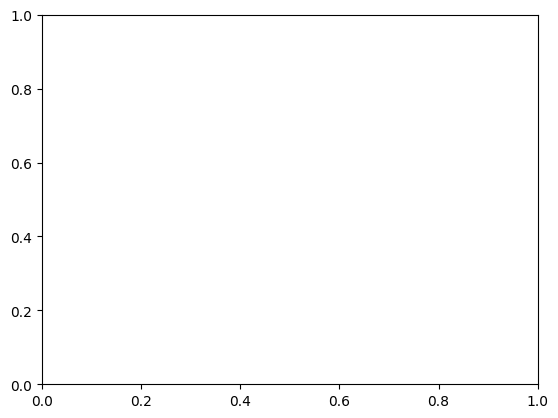

In [34]:
# visualaise 
plt.scatter(x_train,y_train, color = 'green')
plt.plot(x_train , regressor.predict(x_train), color = 'blue')
plt.title('Administration,Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()